# Rugby Analytics

Data

1. Field zones:
1:	Own 22	
2:	Own 50	
3:	Opponent 50	
4: Opponent 22	

2. Platforms	
R: Restart	
S: Scrum	
L: Lineout	
P: Penalty	
F: Free kick	
T: Turnover	
K: Kick-return	

3. Ruck: Each time the ball goes to the ground in a contact situation
4. Pass: Ball is transferred from player to player				
5. Clear: Kick to relieve pressure or win territory up-field	
6. Contest: Kick to try and pressure opponent and/or win back possession up-field	
7. Score: Penalties and drop goals count 3. Score a try by placing ball over the goal line = 5. Kick to convert that try = 7

Resources 

1. EDA resources https://github.com/qistudio/ifn619/tree/master/archive/2021
2. Numpy API documentation https://numpy.org/doc/stable/reference/routines.html

Importing all the library 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import array

In [3]:
pd.set_option('display.max_rows', 400)

In [4]:
data = pd.read_csv('Rugby_data_all.csv')
data.fillna(0,inplace = True)
np.shape(data)

(4156, 11)

Dimensions include all the three datasets 

In [5]:
data.head(10)

,Team A Home,Team B Away,Date,Attack team,Field Zone,Platform,Ruck,Pass,Clear,Contestable,Score
0,All Blacks,Wallabies,7/08/2021,A,1,R,2.0,3.0,1.0,0.0,0.0
1,All Blacks,Wallabies,7/08/2021,B,3,L,0.0,0.0,0.0,0.0,0.0
2,All Blacks,Wallabies,7/08/2021,B,3,P,0.0,0.0,1.0,0.0,0.0
3,All Blacks,Wallabies,7/08/2021,B,4,L,0.0,0.0,0.0,0.0,0.0
4,All Blacks,Wallabies,7/08/2021,A,1,S,2.0,1.0,1.0,0.0,0.0
5,All Blacks,Wallabies,7/08/2021,B,1,K,1.0,2.0,0.0,0.0,0.0
6,All Blacks,Wallabies,7/08/2021,B,2,P,0.0,0.0,1.0,0.0,0.0
7,All Blacks,Wallabies,7/08/2021,B,3,L,0.0,0.0,0.0,0.0,0.0
8,All Blacks,Wallabies,7/08/2021,A,2,S,2.0,0.0,0.0,0.0,0.0
9,All Blacks,Wallabies,7/08/2021,B,3,P,0.0,0.0,1.0,0.0,0.0


In [6]:
data.tail(5)

,Team A Home,Team B Away,Date,Attack team,Field Zone,Platform,Ruck,Pass,Clear,Contestable,Score
4151,Wallabies,New Zealand,5/09/2021,A,2,S,0.0,0.0,0.0,0.0,0.0
4152,Wallabies,New Zealand,5/09/2021,A,2,P,0.0,0.0,1.0,0.0,0.0
4153,Wallabies,New Zealand,5/09/2021,A,3,L,4.0,8.0,0.0,0.0,7.0
4154,Wallabies,New Zealand,5/09/2021,A,2,R,1.0,1.0,0.0,0.0,0.0
4155,Wallabies,New Zealand,5/09/2021,B,3,S,0.0,1.0,1.0,0.0,0.0


# EDA 

In [7]:
unique_date = np.unique(data['Date'])
np.sort(unique_date)

array(['12/03/2022', '12/09/2021', '13/03/2022', '13/07/2021',
       '14/02/2022', '14/08/2021', '14/11/2021', '15/08/2021',
       '17/07/2021', '18/09/2021', '2/10/2021', '20/03/2022',
       '21/08/2021', '21/11/2021', '22/08/2021', '24/07/2021',
       '25/09/2021', '27/02/2022', '28/02/2022', '31/07/2021',
       '5/08/2021', '5/09/2021', '6/02/2022', '7/02/2022', '7/07/2021',
       '7/08/2021', '8/11/2021'], dtype=object)

In [8]:
import datetime
dates = [datetime.datetime.strptime(ts, "%d/%m/%Y") for ts in unique_date]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%d/%m/%Y") for ts in dates]
sorteddates

['07/07/2021',
 '13/07/2021',
 '17/07/2021',
 '24/07/2021',
 '31/07/2021',
 '05/08/2021',
 '07/08/2021',
 '14/08/2021',
 '15/08/2021',
 '21/08/2021',
 '22/08/2021',
 '05/09/2021',
 '12/09/2021',
 '18/09/2021',
 '25/09/2021',
 '02/10/2021',
 '08/11/2021',
 '14/11/2021',
 '21/11/2021',
 '06/02/2022',
 '07/02/2022',
 '14/02/2022',
 '27/02/2022',
 '28/02/2022',
 '12/03/2022',
 '13/03/2022',
 '20/03/2022']

In [9]:
data['Match Day No'] = data.Date.map({"7/07/2021": 1, "13/07/2021": 2, "17/07/2021": 3, "24/07/2021": 4, "31/07/2021": 5, "5/08/2021": 6,
                                  "7/08/2021": 7, "14/08/2021": 8, "15/08/2021": 9, "21/08/2021": 10, '22/08/2021': 11, '5/09/2021': 12, '12/09/2021': 13, '18/09/2021': 14,
                                     '25/09/2021': 15, '2/10/2021': 16, '8/11/2021': 17, '14/11/2021': 18, '21/11/2021': 19, '06/02/2022': 20, '07/02/2022': 21, '14/02/2022': 22,
                                     '27/02/2022': 23, '28/02/2022': 24, '12/03/2022': 25, '13/03/2022': 26, '20/03/2022': 27})

1. Total of 27 dates of play recorded
2. Data contains records of matches played from 07/07/2021 to 20/03/2022

<AxesSubplot:ylabel='Contestable'>

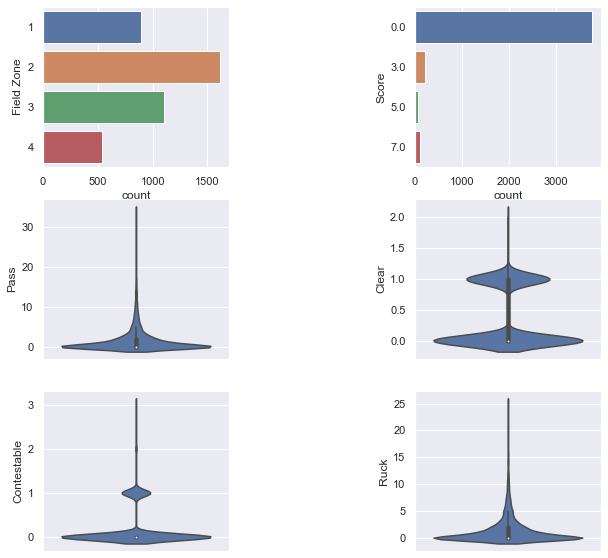

In [10]:
f, axes = plt.subplots(3,2, figsize=(10,10))

plt.subplots_adjust(wspace=1)

sns.countplot( y= 'Field Zone',  data=data, ax=axes[0,0])

sns.countplot( y= 'Score',  data=data, ax=axes[0,1])

sns.violinplot( y= 'Ruck',  data=data, ax=axes[2,1])

sns.violinplot( y= 'Pass',  data=data, ax=axes[1,0])

sns.violinplot( y= 'Clear',  data=data, ax=axes[1,1])

sns.violinplot( y= 'Contestable',  data=data, ax=axes[2,0])

1. Highest activity in zone 2, followed by zone 3
2. Most sequences of play result in no score 

In [11]:
correlation_matrix = data.corr()
correlation_matrix

,Field Zone,Ruck,Pass,Clear,Contestable,Score,Match Day No
Field Zone,1.000000,0.110046,0.113065,-0.364189,-0.073796,0.287018,-0.044021
Ruck,0.110046,1.000000,0.763451,-0.262364,0.113010,0.050018,-0.037147
Pass,0.113065,0.763451,1.000000,-0.249347,0.097056,0.071689,0.107360
Clear,-0.364189,-0.262364,-0.249347,1.000000,-0.276847,-0.222420,0.073716
Contestable,-0.073796,0.113010,0.097056,-0.276847,1.000000,-0.061607,-0.003378
Score,0.287018,0.050018,0.071689,-0.222420,-0.061607,1.000000,-0.031991
Match Day No,-0.044021,-0.037147,0.107360,0.073716,-0.003378,-0.031991,1.000000


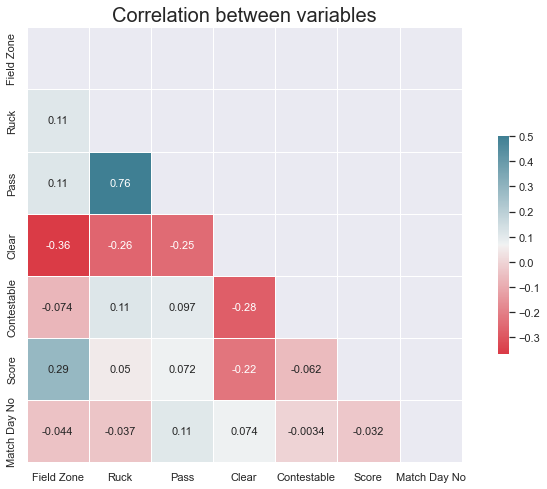

In [12]:
sns.set(style='dark')

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(13,8))

cmap = sns.diverging_palette(10,220, as_cmap=True)

ax = sns.heatmap(correlation_matrix, mask=mask, 
                 cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, 
                 square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
                 cbar_kws={'shrink': .5}, ax=ax)

ax.set_title('Correlation between variables', fontsize=20);

1. Ruck and Pass with highest positive correlation (0.76)
2. Clear and Field Zone with highest negative correlation (-0.36)

** Relate back with clear meaning and suporting papers here **

# Wallabies Analysis 

In [13]:
wallabies_home_overall = data[(data['Team A Home'] == 'Wallabies')]
wallabies_away_overall = data[(data['Team B Away'] == 'Wallabies')]
wallabies_overall = pd.concat([wallabies_home_overall, wallabies_away_overall])
wallabies_overall.head(20)

,Team A Home,Team B Away,Date,Attack team,Field Zone,Platform,Ruck,Pass,Clear,Contestable,Score,Match Day No
198,Wallabies,France,13/07/2021,B,2,R,0.0,1.0,0.0,1.0,0.0,2.0
199,Wallabies,France,13/07/2021,A,2,K,6.0,3.0,0.0,0.0,0.0,2.0
200,Wallabies,France,13/07/2021,B,3,P,0.0,0.0,0.0,0.0,3.0,2.0
201,Wallabies,France,13/07/2021,B,2,R,2.0,0.0,1.0,0.0,0.0,2.0
202,Wallabies,France,13/07/2021,A,2,K,10.0,6.0,0.0,0.0,0.0,2.0
203,Wallabies,France,13/07/2021,A,3,P,9.0,6.0,0.0,0.0,0.0,2.0
204,Wallabies,France,13/07/2021,B,2,T,1.0,0.0,1.0,0.0,0.0,2.0
205,Wallabies,France,13/07/2021,A,2,K,2.0,1.0,1.0,0.0,0.0,2.0
206,Wallabies,France,13/07/2021,A,2,P,2.0,0.0,0.0,0.0,0.0,2.0
207,Wallabies,France,13/07/2021,B,2,T,3.0,0.0,0.0,0.0,0.0,2.0


In [14]:
wallabies_overall['Home/Away'] = np.where(wallabies_overall['Team A Home'] == 'Wallabies', 'Home', 'Away')
np.shape(wallabies_overall)

(1842, 13)

In [15]:
wallabies_overall.head(10)

,Team A Home,Team B Away,Date,Attack team,Field Zone,Platform,Ruck,Pass,Clear,Contestable,Score,Match Day No,Home/Away
198,Wallabies,France,13/07/2021,B,2,R,0.0,1.0,0.0,1.0,0.0,2.0,Home
199,Wallabies,France,13/07/2021,A,2,K,6.0,3.0,0.0,0.0,0.0,2.0,Home
200,Wallabies,France,13/07/2021,B,3,P,0.0,0.0,0.0,0.0,3.0,2.0,Home
201,Wallabies,France,13/07/2021,B,2,R,2.0,0.0,1.0,0.0,0.0,2.0,Home
202,Wallabies,France,13/07/2021,A,2,K,10.0,6.0,0.0,0.0,0.0,2.0,Home
203,Wallabies,France,13/07/2021,A,3,P,9.0,6.0,0.0,0.0,0.0,2.0,Home
204,Wallabies,France,13/07/2021,B,2,T,1.0,0.0,1.0,0.0,0.0,2.0,Home
205,Wallabies,France,13/07/2021,A,2,K,2.0,1.0,1.0,0.0,0.0,2.0,Home
206,Wallabies,France,13/07/2021,A,2,P,2.0,0.0,0.0,0.0,0.0,2.0,Home
207,Wallabies,France,13/07/2021,B,2,T,3.0,0.0,0.0,0.0,0.0,2.0,Home


In [16]:
wallabies_overall.tail(10)

,Team A Home,Team B Away,Date,Attack team,Field Zone,Platform,Ruck,Pass,Clear,Contestable,Score,Match Day No,Home/Away
4033,New Zealand,Wallabies,14/08/2021,B,3,L,0.0,4.0,0.0,1.0,0.0,8.0,Away
4034,New Zealand,Wallabies,14/08/2021,B,4,S,0.0,0.0,0.0,0.0,0.0,8.0,Away
4035,New Zealand,Wallabies,14/08/2021,A,1,P,0.0,0.0,1.0,0.0,0.0,8.0,Away
4036,New Zealand,Wallabies,14/08/2021,B,3,L,0.0,0.0,0.0,0.0,0.0,8.0,Away
4037,New Zealand,Wallabies,14/08/2021,B,3,S,2.0,6.0,0.0,0.0,0.0,8.0,Away
4038,New Zealand,Wallabies,14/08/2021,A,3,T,2.0,3.0,0.0,0.0,0.0,8.0,Away
4039,New Zealand,Wallabies,14/08/2021,B,2,T,1.0,5.0,0.0,0.0,0.0,8.0,Away
4040,New Zealand,Wallabies,14/08/2021,A,1,K,2.0,4.0,0.0,0.0,0.0,8.0,Away
4041,New Zealand,Wallabies,14/08/2021,B,2,T,0.0,1.0,0.0,0.0,0.0,8.0,Away
4042,New Zealand,Wallabies,14/08/2021,A,3,T,0.0,1.0,0.0,0.0,7.0,8.0,Away


In [17]:
reference = wallabies_overall[['Match Day No', 'Home/Away']].drop_duplicates().reset_index(drop=True).sort_values(by='Match Day No', ascending=True)
reference

,Match Day No,Home/Away
1,1.0,Home
0,2.0,Home
2,3.0,Home
3,6.0,Home
9,7.0,Away
10,8.0,Away
8,12.0,Home
4,13.0,Home
5,14.0,Home
6,15.0,Home


All the match days that Wallabies have played a game 

In [18]:
game_sums = wallabies_overall.groupby(['Match Day No']).sum()
game_sums = game_sums.merge(reference, how='left', on='Match Day No')
game_sums

,Match Day No,Field Zone,Ruck,Pass,Clear,Contestable,Score,Home/Away
0,1.0,241,164.0,139.0,37.0,10.0,44.0,Home
1,2.0,227,270.0,213.0,28.0,9.0,54.0,Home
2,3.0,240,148.0,126.0,28.0,11.0,63.0,Home
3,6.0,245,230.0,124.0,38.0,14.0,59.0,Home
4,7.0,226,225.0,128.0,29.0,6.0,58.0,Away
5,8.0,502,282.0,282.0,62.0,26.0,158.0,Away
6,12.0,245,124.0,230.0,38.0,14.0,59.0,Home
7,13.0,508,242.0,242.0,68.0,40.0,108.0,Home
8,14.0,536,234.0,234.0,94.0,40.0,94.0,Home
9,15.0,273,245.0,137.0,53.0,12.0,35.0,Home


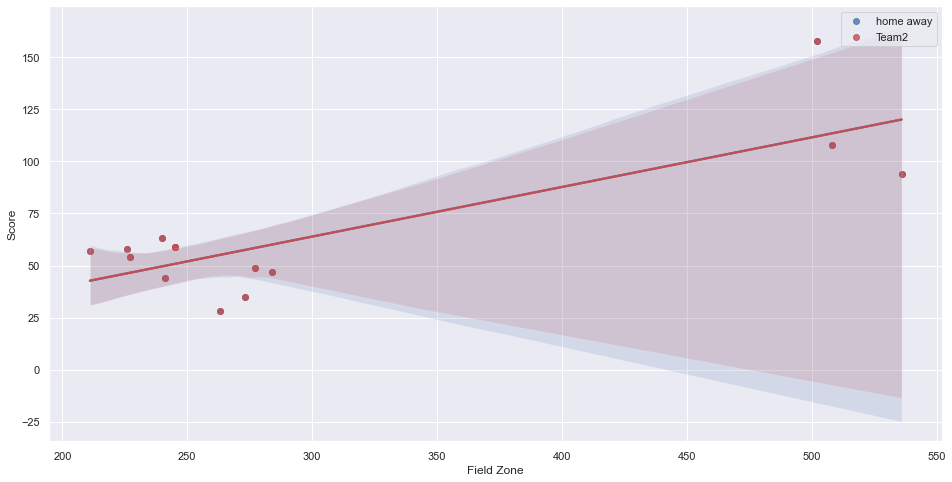

In [19]:
fig, ax = plt.subplots(figsize=(16,8))
p = sns.regplot(x='Field Zone', y='Score', data=game_sums, ax=ax, label='home away')
p2 = sns.regplot(x='Field Zone', y='Score', data=game_sums, ax=ax, label='Team2', color='r')
#plt.xlim(2011, 2018)
ax.grid()
ax.legend(loc="best")

Trying different things here, makes any sense? 

Found on https://seaborn.pydata.org/generated/seaborn.regplot.html

In [20]:
columns = ['Ruck', 'Pass', 'Clear', 'Contestable', 'Score']

all_games_avg = pd.DataFrame(game_sums[columns].mean().reset_index(name='All Match Avg'))
home_avg = pd.DataFrame(game_sums[game_sums['Home/Away'] == 'Home'][columns].mean().reset_index(name='Home Avg'))
away_avg = pd.DataFrame(game_sums[game_sums['Home/Away'] == 'Away'][columns].mean().reset_index(name='Away Avg'))

In [21]:
print('---------------------------------')
print(all_games_avg)
print('---------------------------------')
print(home_avg)
print('---------------------------------')
print(away_avg)
print('---------------------------------')

---------------------------------
         index  All Match Avg
0         Ruck     198.428571
1         Pass     186.642857
2        Clear      46.428571
3  Contestable      17.285714
4        Score      65.214286
---------------------------------
         index    Home Avg
0         Ruck  214.111111
1         Pass  174.777778
2        Clear   48.111111
3  Contestable   18.333333
4        Score   62.777778
---------------------------------
         index  Away Avg
0         Ruck     170.2
1         Pass     208.0
2        Clear      43.4
3  Contestable      15.4
4        Score      69.6
---------------------------------


In [22]:
avg_comparison = all_games_avg.merge(home_avg, how='left', on='index')
avg_comparison = avg_comparison.merge(away_avg, how='left', on='index')
avg_comparison

,index,All Match Avg,Home Avg,Away Avg
0,Ruck,198.428571,214.111111,170.2
1,Pass,186.642857,174.777778,208.0
2,Clear,46.428571,48.111111,43.4
3,Contestable,17.285714,18.333333,15.4
4,Score,65.214286,62.777778,69.6


Looks better 

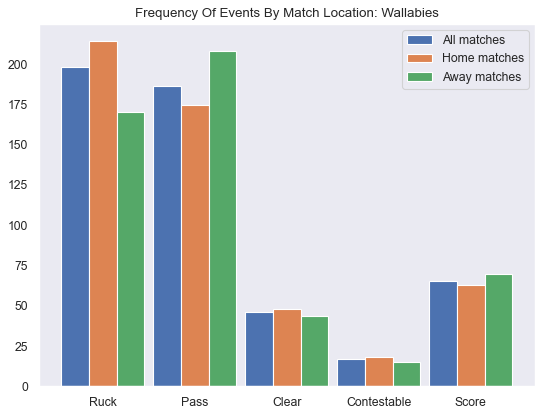

In [23]:
plt.figure(figsize=(8, 6), dpi=80)

X = avg_comparison['index'].tolist()
X_axis = np.arange(len(X))

plt.bar(X_axis-0.3, avg_comparison['All Match Avg'],width=0.3, label = 'All matches')
plt.bar(X_axis, avg_comparison['Home Avg'],width=0.3, label = 'Home matches')
plt.bar(X_axis+0.3, avg_comparison['Away Avg'],width=0.3, label = 'Away matches')

plt.xticks(X_axis, X)
plt.title('Frequency Of Events By Match Location: Wallabies')
plt.legend()

plt.show()

1. Ruck and Clear higher on home matches of wallabies
2. Passing clearly most prominent during away matches

In [24]:
field_pos_home = wallabies_overall[['Match Day No','Field Zone', 'Team A Home']].groupby(['Match Day No','Field Zone']).count().reset_index()
field_pos_home = field_pos_home.rename(columns={'Team A Home':'N Sequences'})

In [25]:
field_pos_home = field_pos_home.pivot_table(index=['Field Zone'], columns = 'Match Day No', values='N Sequences').reset_index()
field_pos_home

Match Day No,Field Zone,1.0,2.0,3.0,6.0,7.0,8.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
0,1,20,18,18,30,19,42,30,40,70,31,20,31,23,24
1,2,43,39,25,45,31,80,45,76,66,48,51,46,63,35
2,3,21,25,36,27,27,52,27,52,50,30,29,28,29,23
3,4,18,14,16,11,16,36,11,40,46,14,17,14,12,12


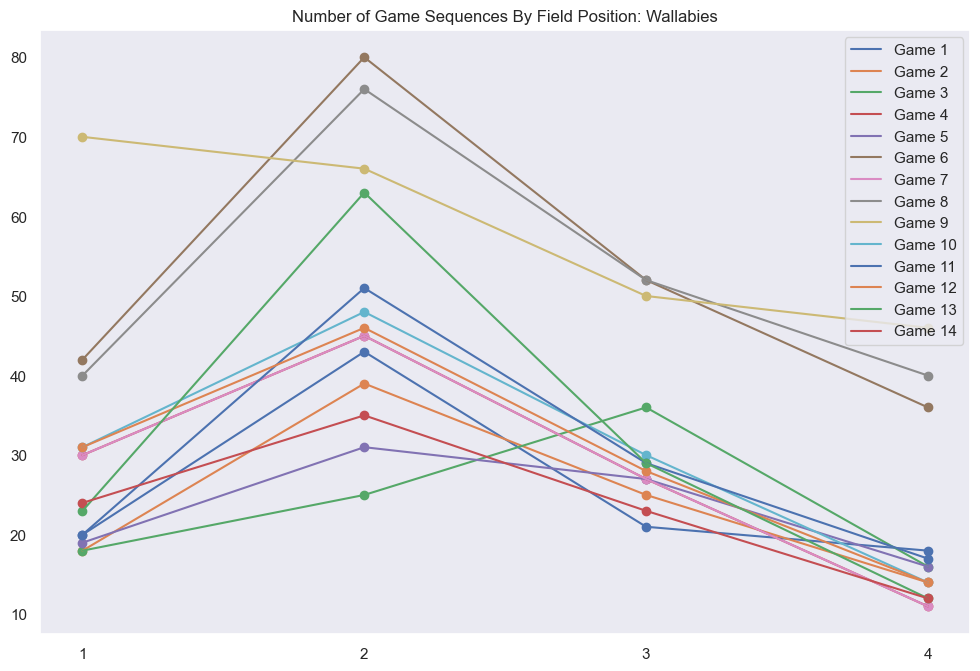

In [26]:
plt.figure(figsize=(12, 8), dpi=100)

plt.plot(field_pos_home['Field Zone'].astype(str),field_pos_home[1], label='Game 1')
plt.scatter(field_pos_home['Field Zone'].astype(str),field_pos_home[1])

plt.plot(field_pos_home['Field Zone'].astype(str),field_pos_home[2], label='Game 2')
plt.scatter(field_pos_home['Field Zone'].astype(str),field_pos_home[2])

plt.plot(field_pos_home['Field Zone'].astype(str),field_pos_home[3], label='Game 3')
plt.scatter(field_pos_home['Field Zone'].astype(str),field_pos_home[3])

plt.plot(field_pos_home['Field Zone'].astype(str),field_pos_home[6], label='Game 4')
plt.scatter(field_pos_home['Field Zone'].astype(str),field_pos_home[6])

plt.plot(field_pos_home['Field Zone'].astype(str),field_pos_home[7], label='Game 5')
plt.scatter(field_pos_home['Field Zone'].astype(str),field_pos_home[7])

plt.plot(field_pos_home['Field Zone'].astype(str),field_pos_home[8], label='Game 6')
plt.scatter(field_pos_home['Field Zone'].astype(str),field_pos_home[8])

plt.plot(field_pos_home['Field Zone'].astype(str),field_pos_home[12], label='Game 7')
plt.scatter(field_pos_home['Field Zone'].astype(str),field_pos_home[12])

plt.plot(field_pos_home['Field Zone'].astype(str),field_pos_home[13], label='Game 8')
plt.scatter(field_pos_home['Field Zone'].astype(str),field_pos_home[13])

plt.plot(field_pos_home['Field Zone'].astype(str),field_pos_home[14], label='Game 9')
plt.scatter(field_pos_home['Field Zone'].astype(str),field_pos_home[14])

plt.plot(field_pos_home['Field Zone'].astype(str),field_pos_home[15], label='Game 10')
plt.scatter(field_pos_home['Field Zone'].astype(str),field_pos_home[15])

plt.plot(field_pos_home['Field Zone'].astype(str),field_pos_home[16], label='Game 11')
plt.scatter(field_pos_home['Field Zone'].astype(str),field_pos_home[16])

plt.plot(field_pos_home['Field Zone'].astype(str),field_pos_home[17], label='Game 12')
plt.scatter(field_pos_home['Field Zone'].astype(str),field_pos_home[17])

plt.plot(field_pos_home['Field Zone'].astype(str),field_pos_home[18], label='Game 13')
plt.scatter(field_pos_home['Field Zone'].astype(str),field_pos_home[18])

plt.plot(field_pos_home['Field Zone'].astype(str),field_pos_home[19], label='Game 14')
plt.scatter(field_pos_home['Field Zone'].astype(str),field_pos_home[19])

plt.title('Number of Game Sequences By Field Position: Wallabies')

plt.legend()
plt.show()

1. Most of the play sequences decrease as the wallabies gain field position 
2. Is this because wallabies loose ball possession? 

Found on https://stackoverflow.com/questions/16992038/inline-labels-in-matplotlib and https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html 

In [27]:
wallabies_overall[wallabies_overall['Score'] != 0.0]['Field Zone'].value_counts().sort_values()

1     6
2    23
4    82
3    84
Name: Field Zone, dtype: int64

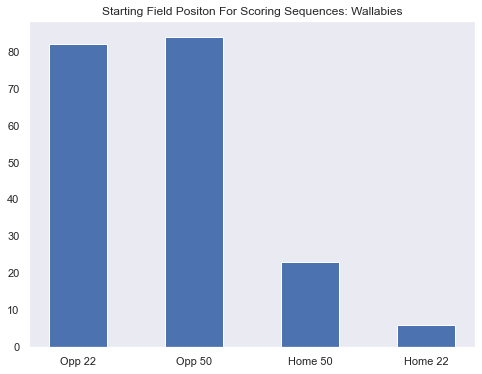

In [28]:
plt.figure(figsize=(8, 6))

X = ['Opp 22', 'Opp 50', 'Home 50', 'Home 22']
y = [82, 84, 23, 6]
X_axis = np.arange(len(X))

plt.bar(X_axis,y,width=0.5)

plt.xticks(X_axis, X)
plt.title('Starting Field Positon For Scoring Sequences: Wallabies')

plt.show()

Wallabies are able to score when the play starts to develop from field zone 3 and 4 

In [29]:
np.shape(wallabies_overall[(wallabies_overall['Contestable'] != 0.0)])

(236, 13)

In [30]:
contest_plays = wallabies_overall[(wallabies_overall['Contestable'] != 0.0) & (wallabies_overall['Score'] != 0.0)]
contest_plays

,Team A Home,Team B Away,Date,Attack team,Field Zone,Platform,Ruck,Pass,Clear,Contestable,Score,Match Day No,Home/Away
516,Wallabies,All Blacks,5/08/2021,B,2,K,6.0,3.0,0.0,1.0,7.0,6.0,Home
593,Wallabies,All Blacks,5/08/2021,B,1,T,2.0,0.0,0.0,1.0,5.0,6.0,Home
758,Wallabies,Springboks,18/09/2021,B,4,P,10.0,3.0,0.0,1.0,5.0,14.0,Home
849,Wallabies,Argentina,25/09/2021,A,3,T,15.0,5.0,0.0,1.0,7.0,15.0,Home
3522,Wallabies,South Affrica,18/09/2021,B,4,P,3.0,10.0,0.0,1.0,5.0,14.0,Home
4068,Wallabies,New Zealand,5/09/2021,B,2,K,3.0,6.0,0.0,1.0,7.0,12.0,Home
4145,Wallabies,New Zealand,5/09/2021,B,1,T,0.0,2.0,0.0,1.0,5.0,12.0,Home
82,All Blacks,Wallabies,7/08/2021,B,3,L,4.0,2.0,0.0,1.0,5.0,7.0,Away
100,All Blacks,Wallabies,14/08/2021,B,3,L,10.0,8.0,0.0,1.0,5.0,8.0,Away
1999,Wales,Wallabies,21/11/2021,B,2,K,8.0,13.0,0.0,2.0,7.0,19.0,Away


Out of 236 sequences of play that involved a contestable kick, wallabies were able to score after the contestable action only 11 times. Thats a conversion rate of 4.66%. 

Need to check this. 

In [31]:
rucks_contest = (wallabies_overall[['Match Day No', 'Ruck', 'Contestable']].groupby('Match Day No').sum().reset_index())
rucks_contest['Ratio'] = (rucks_contest['Contestable']/rucks_contest['Ruck'])*100
rucks_contest

,Match Day No,Ruck,Contestable,Ratio
0,1.0,164.0,10.0,6.097561
1,2.0,270.0,9.0,3.333333
2,3.0,148.0,11.0,7.432432
3,6.0,230.0,14.0,6.086957
4,7.0,225.0,6.0,2.666667
5,8.0,282.0,26.0,9.219858
6,12.0,124.0,14.0,11.290323
7,13.0,242.0,40.0,16.528926
8,14.0,234.0,40.0,17.094017
9,15.0,245.0,12.0,4.897959


Higher ratio indicates better chances of putting pressure on the opponents when a Ruck and Contestable kick is involved in a game sequence 

# Frequent Itemset Mining using Apriori algorithm 

Resources

https://www.codespeedy.com/apriori-algorithm-in-python/

http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/

https://github.com/WilliamLin1004/Mining_Apriori_1/blob/master/ECT_HW3_104403553_v1.ipynb

https://github.com/Jkt1412/Frequent-Item-Mining/blob/master/FP_Growth.ipynb

https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/

Support: It is calculated by dividing the number of transactions having the item by the total number of transactions.

Confidence: It is the measure of trustworthiness and can be calculated using the below formula.

Lift: It is the probability of purchasing B when A is sold.

1. Lift(A => B) =1 : There is no relation between A and B.
2. Lift(A => B)> 1: There is a positive relation between the item set . It means, when product A is bought, it is more likely that B is also bought.
3. Lift(A => B)< 1: There is a negative relation between the items. It means, if product A is bought, it is less likely that B is also bought.

In [32]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [33]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [34]:
data2 = wallabies_overall.copy()

In [35]:
cat_mapping = { 
    1: 'Own 22',
    2: 'Own 50',
    3: 'Opp 50',
    4: 'Opp 22',
    'R': 'Restart',
    'S': 'Scrum',
    'L': 'Lineout',
    'P': 'Penalty',
    'F': 'Free Kick',
    'T': 'Turnover',
    'K': 'Kick-return'
}

In [36]:
# Numerical Flags
for col in ['Ruck', 'Pass', 'Clear', 'Contestable', 'Score']:
    data2[col+'_flag'] = np.where(data2[col] != 0.0, col, np.nan)
    
# Categorical Flags
for col in ['Field Zone', 'Platform']:
    data2[col+'_flag'] = data2[col].map(cat_mapping)

In [37]:
data2.head(50)

,Team A Home,Team B Away,Date,Attack team,Field Zone,Platform,Ruck,Pass,Clear,Contestable,Score,Match Day No,Home/Away,Ruck_flag,Pass_flag,Clear_flag,Contestable_flag,Score_flag,Field Zone_flag,Platform_flag
198,Wallabies,France,13/07/2021,B,2,R,0.0,1.0,0.0,1.0,0.0,2.0,Home,nan,Pass,nan,Contestable,nan,Own 50,Restart
199,Wallabies,France,13/07/2021,A,2,K,6.0,3.0,0.0,0.0,0.0,2.0,Home,Ruck,Pass,nan,nan,nan,Own 50,Kick-return
200,Wallabies,France,13/07/2021,B,3,P,0.0,0.0,0.0,0.0,3.0,2.0,Home,nan,nan,nan,nan,Score,Opp 50,Penalty
201,Wallabies,France,13/07/2021,B,2,R,2.0,0.0,1.0,0.0,0.0,2.0,Home,Ruck,nan,Clear,nan,nan,Own 50,Restart
202,Wallabies,France,13/07/2021,A,2,K,10.0,6.0,0.0,0.0,0.0,2.0,Home,Ruck,Pass,nan,nan,nan,Own 50,Kick-return
203,Wallabies,France,13/07/2021,A,3,P,9.0,6.0,0.0,0.0,0.0,2.0,Home,Ruck,Pass,nan,nan,nan,Opp 50,Penalty
204,Wallabies,France,13/07/2021,B,2,T,1.0,0.0,1.0,0.0,0.0,2.0,Home,Ruck,nan,Clear,nan,nan,Own 50,Turnover
205,Wallabies,France,13/07/2021,A,2,K,2.0,1.0,1.0,0.0,0.0,2.0,Home,Ruck,Pass,Clear,nan,nan,Own 50,Kick-return
206,Wallabies,France,13/07/2021,A,2,P,2.0,0.0,0.0,0.0,0.0,2.0,Home,Ruck,nan,nan,nan,nan,Own 50,Penalty
207,Wallabies,France,13/07/2021,B,2,T,3.0,0.0,0.0,0.0,0.0,2.0,Home,Ruck,nan,nan,nan,nan,Own 50,Turnover


In [38]:
columns_keep = data2[['Ruck_flag', 'Pass_flag', 'Clear_flag','Contestable_flag', 'Score_flag','Field Zone_flag', 'Platform_flag']]
test_array = columns_keep.to_numpy()

In [39]:
test = [[y for y in x if y != 'nan'] for x in columns_keep.values.tolist()]

In [40]:
encoder = TransactionEncoder()
transactionEncoder_arr = encoder.fit(test).transform(test)
data3 = pd.DataFrame(transactionEncoder_arr, columns=encoder.columns_)

In [41]:
data3.head(10)

,Clear,Contestable,Free Kick,Kick-return,Lineout,Opp 22,Opp 50,Own 22,Own 50,Pass,Penalty,Restart,Ruck,Score,Scrum,Turnover
0,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False
1,False,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False
2,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False
3,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False
4,False,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False
5,False,False,False,False,False,False,True,False,False,True,True,False,True,False,False,False
6,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True
7,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False
8,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False
9,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True


In [42]:
frequent_itemsets = apriori(data3,min_support = 0.01, use_colnames = True)
frequent_itemsets.head(50)

,support,itemsets
0,0.352334,(Clear)
1,0.128122,(Contestable)
2,0.010315,(Free Kick)
3,0.200326,(Kick-return)
4,0.243214,(Lineout)
5,0.150380,(Opp 22)
6,0.247557,(Opp 50)
7,0.225841,(Own 22)
8,0.376221,(Own 50)
9,0.445711,(Pass)


In [43]:
frequent_itemsets.tail(50)

,support,itemsets
165,0.017915,"(Own 50, Scrum, Pass)"
166,0.026059,"(Own 50, Pass, Turnover)"
167,0.023887,"(Own 50, Ruck, Restart)"
168,0.020087,"(Own 50, Ruck, Scrum)"
169,0.027687,"(Own 50, Ruck, Turnover)"
170,0.058089,"(Ruck, Restart, Pass)"
171,0.032573,"(Ruck, Score, Pass)"
172,0.038002,"(Ruck, Scrum, Pass)"
173,0.048317,"(Ruck, Pass, Turnover)"
174,0.017372,"(Kick-return, Own 50, Clear, Pass)"


In [44]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'Score'}]

,support,itemsets
13,0.105863,(Score)


In [45]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'Penalty'}]

,support,itemsets
10,0.216069,(Penalty)


In [46]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'Score', 'Penalty'}]

,support,itemsets
80,0.050489,"(Penalty, Score)"


# Game Insights

In [47]:
contest_plays = wallabies_overall[(wallabies_overall['Contestable'] != 0.0) & (wallabies_overall['Score'] != 0)]

In [48]:
contest_plays

,Team A Home,Team B Away,Date,Attack team,Field Zone,Platform,Ruck,Pass,Clear,Contestable,Score,Match Day No,Home/Away
516,Wallabies,All Blacks,5/08/2021,B,2,K,6.0,3.0,0.0,1.0,7.0,6.0,Home
593,Wallabies,All Blacks,5/08/2021,B,1,T,2.0,0.0,0.0,1.0,5.0,6.0,Home
758,Wallabies,Springboks,18/09/2021,B,4,P,10.0,3.0,0.0,1.0,5.0,14.0,Home
849,Wallabies,Argentina,25/09/2021,A,3,T,15.0,5.0,0.0,1.0,7.0,15.0,Home
3522,Wallabies,South Affrica,18/09/2021,B,4,P,3.0,10.0,0.0,1.0,5.0,14.0,Home
4068,Wallabies,New Zealand,5/09/2021,B,2,K,3.0,6.0,0.0,1.0,7.0,12.0,Home
4145,Wallabies,New Zealand,5/09/2021,B,1,T,0.0,2.0,0.0,1.0,5.0,12.0,Home
82,All Blacks,Wallabies,7/08/2021,B,3,L,4.0,2.0,0.0,1.0,5.0,7.0,Away
100,All Blacks,Wallabies,14/08/2021,B,3,L,10.0,8.0,0.0,1.0,5.0,8.0,Away
1999,Wales,Wallabies,21/11/2021,B,2,K,8.0,13.0,0.0,2.0,7.0,19.0,Away


Rucks to contestable kicks ratio

In [49]:
wallabies_overall.head(10)

,Team A Home,Team B Away,Date,Attack team,Field Zone,Platform,Ruck,Pass,Clear,Contestable,Score,Match Day No,Home/Away
198,Wallabies,France,13/07/2021,B,2,R,0.0,1.0,0.0,1.0,0.0,2.0,Home
199,Wallabies,France,13/07/2021,A,2,K,6.0,3.0,0.0,0.0,0.0,2.0,Home
200,Wallabies,France,13/07/2021,B,3,P,0.0,0.0,0.0,0.0,3.0,2.0,Home
201,Wallabies,France,13/07/2021,B,2,R,2.0,0.0,1.0,0.0,0.0,2.0,Home
202,Wallabies,France,13/07/2021,A,2,K,10.0,6.0,0.0,0.0,0.0,2.0,Home
203,Wallabies,France,13/07/2021,A,3,P,9.0,6.0,0.0,0.0,0.0,2.0,Home
204,Wallabies,France,13/07/2021,B,2,T,1.0,0.0,1.0,0.0,0.0,2.0,Home
205,Wallabies,France,13/07/2021,A,2,K,2.0,1.0,1.0,0.0,0.0,2.0,Home
206,Wallabies,France,13/07/2021,A,2,P,2.0,0.0,0.0,0.0,0.0,2.0,Home
207,Wallabies,France,13/07/2021,B,2,T,3.0,0.0,0.0,0.0,0.0,2.0,Home


In [50]:
rucks_contest = (wallabies_overall[['Match Day No', 'Ruck', 'Contestable']].groupby('Match Day No')
                 .sum()
                 .reset_index())

In [51]:
rucks_contest['ratio'] = (rucks_contest['Contestable']/rucks_contest['Ruck'])*100

In [52]:
rucks_contest

,Match Day No,Ruck,Contestable,ratio
0,1.0,164.0,10.0,6.097561
1,2.0,270.0,9.0,3.333333
2,3.0,148.0,11.0,7.432432
3,6.0,230.0,14.0,6.086957
4,7.0,225.0,6.0,2.666667
5,8.0,282.0,26.0,9.219858
6,12.0,124.0,14.0,11.290323
7,13.0,242.0,40.0,16.528926
8,14.0,234.0,40.0,17.094017
9,15.0,245.0,12.0,4.897959


Kicks per game

In [53]:
game_kicks = (wallabies_overall[['Match Day No', 'Clear', 'Contestable']].groupby('Match Day No')
                 .sum()
                 .reset_index())

In [54]:
game_kicks

,Match Day No,Clear,Contestable
0,1.0,37.0,10.0
1,2.0,28.0,9.0
2,3.0,28.0,11.0
3,6.0,38.0,14.0
4,7.0,29.0,6.0
5,8.0,62.0,26.0
6,12.0,38.0,14.0
7,13.0,68.0,40.0
8,14.0,94.0,40.0
9,15.0,53.0,12.0


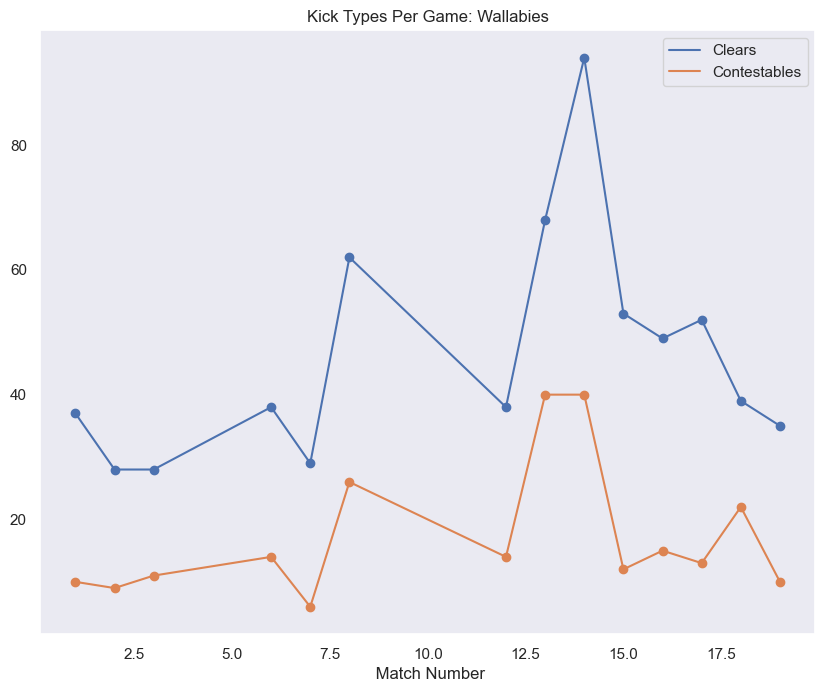

In [55]:
plt.figure(figsize=(10, 8), dpi=100)

plt.plot(game_kicks['Match Day No'], game_kicks['Clear'], label='Clears')
plt.scatter(game_kicks['Match Day No'], game_kicks['Clear'])

plt.plot(game_kicks['Match Day No'], game_kicks['Contestable'], label='Contestables')
plt.scatter(game_kicks['Match Day No'], game_kicks['Contestable'])

plt.title("Kick Types Per Game: Wallabies")
plt.xlabel(" Match Number")
#plt.ylabel(" Kicks Per Game")
plt.legend()

plt.show()

In [56]:
dynamic_plays = (wallabies_overall[(wallabies_overall['Pass'] > 0.0) & (wallabies_overall['Ruck'] > 0.0) & 
                              ((wallabies_overall['Clear'] > 0.0) | (wallabies_overall['Contestable'] > 0.0))])

dynamic_plays['Dynamic Plays'] = 1

dynamic_plays = (wallabies_overall.merge(dynamic_plays, how='left', left_index = True, right_index=True)
                .groupby('Match Day No_x')
                .sum()
                .reset_index())

dynamic_plays = dynamic_plays.drop(['Field Zone_x', 'Ruck_x', 'Pass_x', 'Clear_x',
                                    'Contestable_x', 'Score_x', 'Field Zone_y', 'Ruck_y', 'Pass_y',
                                    'Clear_y', 'Contestable_y', 'Score_y', 'Match Day No_y'], axis=1)

In [57]:
dynamic_plays

,Match Day No_x,Dynamic Plays
0,1.0,13.0
1,2.0,15.0
2,3.0,11.0
3,6.0,17.0
4,7.0,8.0
5,8.0,14.0
6,12.0,17.0
7,13.0,20.0
8,14.0,30.0
9,15.0,15.0


In [58]:
# Function to add change pos  and change field zone columns to all matches
matches = [1,2,3,6,7,8,12,13,14,15,16,17,18,19]

def add_pos(original_df, matches):
    
    matches_dfs = []
    
    for match in matches:
        
        df = original_df[original_df['Match Day No'] == match]
        
        df['Next Pos'] = df['Attack team'].shift(-1)
        
        df['Next Zone'] = df['Field Zone'].shift(-1)
        
        df['Change Pos'] = np.where(df['Attack team'] == df['Next Pos'], 0, 1)
        
        df['Change Zone'] = np.where(df['Field Zone'] == df['Next Zone'], 0, 1)
               
        matches_dfs.append(df)
    
    final_df = pd.concat(matches_dfs)
        
    return final_df

In [59]:
play_outcomes = add_pos(data, matches)

In [60]:
play_outcomes.head(40)

,Team A Home,Team B Away,Date,Attack team,Field Zone,Platform,Ruck,Pass,Clear,Contestable,Score,Match Day No,Next Pos,Next Zone,Change Pos,Change Zone
294,Wallabies,France,7/07/2021,B,2,R,1.0,2.0,1.0,0.0,0.0,1.0,A,2.0,1,0
295,Wallabies,France,7/07/2021,A,2,K,7.0,3.0,0.0,0.0,0.0,1.0,A,2.0,0,0
296,Wallabies,France,7/07/2021,A,2,P,0.0,0.0,1.0,0.0,0.0,1.0,B,1.0,1,1
297,Wallabies,France,7/07/2021,B,1,K,1.0,0.0,1.0,0.0,0.0,1.0,A,2.0,1,1
298,Wallabies,France,7/07/2021,A,2,K,3.0,1.0,0.0,0.0,0.0,1.0,B,2.0,1,0
299,Wallabies,France,7/07/2021,B,2,S,4.0,1.0,0.0,0.0,0.0,1.0,A,1.0,1,1
300,Wallabies,France,7/07/2021,A,1,S,0.0,0.0,0.0,0.0,0.0,1.0,B,4.0,1,1
301,Wallabies,France,7/07/2021,B,4,T,4.0,2.0,0.0,0.0,5.0,1.0,B,2.0,0,1
302,Wallabies,France,7/07/2021,B,2,R,1.0,1.0,0.0,1.0,0.0,1.0,A,2.0,1,0
303,Wallabies,France,7/07/2021,A,2,K,1.0,1.0,0.0,0.0,0.0,1.0,B,3.0,1,1


In [61]:
outcomes_home = play_outcomes[(play_outcomes['Team A Home'] == 'Wallabies') & (play_outcomes['Attack team'] == 'A')]
outcomes_away = play_outcomes[(play_outcomes['Team B Away'] == 'Wallabies') & (play_outcomes['Attack team'] == 'B')]
outcomes_all = pd.concat([outcomes_home, outcomes_away])

In [62]:
outcomes_all

,Team A Home,Team B Away,Date,Attack team,Field Zone,Platform,Ruck,Pass,Clear,Contestable,Score,Match Day No,Next Pos,Next Zone,Change Pos,Change Zone
295,Wallabies,France,7/07/2021,A,2,K,7.0,3.0,0.0,0.0,0.0,1.0,A,2.0,0,0
296,Wallabies,France,7/07/2021,A,2,P,0.0,0.0,1.0,0.0,0.0,1.0,B,1.0,1,1
298,Wallabies,France,7/07/2021,A,2,K,3.0,1.0,0.0,0.0,0.0,1.0,B,2.0,1,0
300,Wallabies,France,7/07/2021,A,1,S,0.0,0.0,0.0,0.0,0.0,1.0,B,4.0,1,1
303,Wallabies,France,7/07/2021,A,2,K,1.0,1.0,0.0,0.0,0.0,1.0,B,3.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,Wales,Wallabies,21/11/2021,B,1,P,0.0,0.0,1.0,0.0,0.0,19.0,B,2.0,0,1
2083,Wales,Wallabies,21/11/2021,B,2,L,0.0,0.0,0.0,0.0,0.0,19.0,B,2.0,0,0
2084,Wales,Wallabies,21/11/2021,B,2,F,0.0,0.0,0.0,1.0,0.0,19.0,A,2.0,1,0
2086,Wales,Wallabies,21/11/2021,B,3,P,0.0,0.0,0.0,0.0,3.0,19.0,B,2.0,0,1


Possession change:

In [63]:
(outcomes_all.drop(['Team A Home', 'Team B Away', 'Date', 'Attack team', 'Field Zone',
       'Platform', 'Ruck', 'Pass', 'Clear', 'Contestable', 'Score', 'Next Zone',
       'Next Pos', 'Change Zone'], axis=1)
 .groupby("Change Pos")
 .count()
 .rename(columns={"Match Day No": "N"}))

,N
Change Pos,
0,410
1,504


In [64]:
(outcomes_all[(outcomes_all['Field Zone'] == 1) & (outcomes_all['Change Zone'] == 0)]
 .drop(['Team A Home', 'Team B Away', 'Date', 'Attack team', 'Field Zone',
       'Platform', 'Ruck', 'Pass', 'Clear', 'Contestable', 'Score', 'Match Day No',
       'Next Pos', 'Next Zone'], axis=1)
 .groupby('Change Pos')
 .count()
 .rename(columns={'Change Zone':'N'}))

,N
Change Pos,
0,21
1,17


In [65]:
opps_home = play_outcomes[(play_outcomes['Team A Home'] != 'Wallabies') & (play_outcomes['Attack team'] == 'A')]
opps_away = play_outcomes[(play_outcomes['Team B Away'] != 'Wallabies') & (play_outcomes['Attack team'] == 'B')]
opps_all = pd.concat([opps_home, opps_away])

In [66]:
(opps_all[(opps_all['Field Zone'] == 1) & (opps_all['Change Zone'] == 0)]
 .drop(['Team A Home', 'Team B Away', 'Date', 'Attack team', 'Field Zone',
       'Platform', 'Ruck', 'Pass', 'Clear', 'Contestable', 'Score', 'Match Day No',
       'Next Pos', 'Next Zone'], axis=1)
 .groupby('Change Pos')
 .count()
 .rename(columns={'Change Zone':'N'}))

,N
Change Pos,
0,26
1,14


In [67]:
outcomes_all.columns

Index(['Team A Home', 'Team B Away', 'Date', 'Attack team', 'Field Zone',
       'Platform', 'Ruck', 'Pass', 'Clear', 'Contestable', 'Score',
       'Match Day No', 'Next Pos', 'Next Zone', 'Change Pos', 'Change Zone'],
      dtype='object')

In [68]:
(outcomes_all.drop(['Team A Home', 'Team B Away', 'Date', 'Attack team',
       'Platform', 'Ruck', 'Pass','Score', 'Match Day No',
       'Next Pos', 'Next Zone', 'Change Pos', 'Change Zone'], axis=1)
 .groupby('Field Zone')
 .sum())

,Clear,Contestable
Field Zone,,
1,114.0,29.0
2,129.0,69.0
3,33.0,25.0
4,29.0,6.0


In [69]:
outcomes_all.columns

Index(['Team A Home', 'Team B Away', 'Date', 'Attack team', 'Field Zone',
       'Platform', 'Ruck', 'Pass', 'Clear', 'Contestable', 'Score',
       'Match Day No', 'Next Pos', 'Next Zone', 'Change Pos', 'Change Zone'],
      dtype='object')

In [70]:
(outcomes_all.drop(['Team A Home', 'Team B Away', 'Date', 'Attack team',
       'Platform','Match Day No','Next Pos', 'Next Zone', 'Change Pos', 'Change Zone'], axis=1)
 .groupby('Field Zone')
 .sum())

,Ruck,Pass,Clear,Contestable,Score
Field Zone,,,,,
1,189.0,188.0,114.0,29.0,0.0
2,560.0,507.0,129.0,69.0,48.0
3,625.0,533.0,33.0,25.0,176.0
4,238.0,226.0,29.0,6.0,198.0


In [71]:
(opps_all.drop(['Team A Home', 'Team B Away', 'Date', 'Attack team','Ruck', 'Pass', 'Clear', 'Contestable',
       'Platform','Match Day No','Next Pos', 'Next Zone', 'Change Pos', 'Change Zone'], axis=1)
 .groupby('Field Zone')
 .sum())

,Score
Field Zone,
1,39.0
2,114.0
3,286.0
4,227.0


In [72]:
opps_all

,Team A Home,Team B Away,Date,Attack team,Field Zone,Platform,Ruck,Pass,Clear,Contestable,Score,Match Day No,Next Pos,Next Zone,Change Pos,Change Zone
0,All Blacks,Wallabies,7/08/2021,A,1,R,2.0,3.0,1.0,0.0,0.0,7.0,B,3.0,1,1
4,All Blacks,Wallabies,7/08/2021,A,1,S,2.0,1.0,1.0,0.0,0.0,7.0,B,1.0,1,0
8,All Blacks,Wallabies,7/08/2021,A,2,S,2.0,0.0,0.0,0.0,0.0,7.0,B,3.0,1,1
11,All Blacks,Wallabies,7/08/2021,A,2,S,5.0,1.0,0.0,0.0,0.0,7.0,B,2.0,1,0
13,All Blacks,Wallabies,7/08/2021,A,3,T,8.0,2.0,0.0,0.0,0.0,7.0,B,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,New Zealand,Springboks,2/10/2021,B,3,K,1.0,1.0,0.0,0.0,3.0,16.0,B,2.0,0,1
1861,New Zealand,Springboks,2/10/2021,B,2,R,0.0,0.0,0.0,0.0,0.0,16.0,A,3.0,1,1
1866,New Zealand,Springboks,2/10/2021,B,2,P,0.0,0.0,1.0,0.0,0.0,16.0,B,4.0,0,1
1867,New Zealand,Springboks,2/10/2021,B,4,L,2.0,2.0,0.0,0.0,0.0,16.0,B,4.0,0,0


In [73]:
(opps_all.drop(['Team A Home', 'Team B Away', 'Date', 'Attack team','Ruck', 'Pass', 'Clear', 'Contestable',
                'Match Day No','Next Pos', 'Next Zone', 'Change Pos', 'Change Zone'], axis=1)
 .groupby(['Field Zone', 'Platform'])
 .sum())

Score
Field Zone Platform       
1          F           0.0
           K           0.0
           L           5.0
           P           0.0
           R           0.0
           S           0.0
           T          34.0
2          F           0.0
           K          38.0
           L          14.0
           P           6.0
           R           0.0
           S           7.0
           T          49.0
3          F           7.0
           K          22.0
           L          53.0
           P         156.0
           R          10.0
           S          10.0
           T          28.0
4          L          81.0
           P         113.0
           S          18.0
           T          15.0

In [74]:
len(opps_all)

1395

# Springbok Analysis 

In [76]:
springboks_home_overall = data[(data['Team A Home'] == 'Springboks')]
springboks_away_overall = data[(data['Team B Away'] == 'Springboks')]
springboks_overall = pd.concat([springboks_home_overall, springboks_away_overall])
springboks_overall.head(20)

,Team A Home,Team B Away,Date,Attack team,Field Zone,Platform,Ruck,Pass,Clear,Contestable,Score,Match Day No
1064,Springboks,B&I Lions,24/07/2021,A,1,R,0.0,1.0,1.0,0.0,0.0,4.0
1065,Springboks,B&I Lions,24/07/2021,B,3,L,1.0,0.0,0.0,1.0,0.0,4.0
1066,Springboks,B&I Lions,24/07/2021,A,1,P,0.0,0.0,1.0,0.0,0.0,4.0
1067,Springboks,B&I Lions,24/07/2021,A,3,L,0.0,1.0,0.0,1.0,0.0,4.0
1068,Springboks,B&I Lions,24/07/2021,B,2,K,1.0,2.0,0.0,1.0,0.0,4.0
1069,Springboks,B&I Lions,24/07/2021,B,3,L,2.0,1.0,0.0,0.0,0.0,4.0
1070,Springboks,B&I Lions,24/07/2021,A,3,T,2.0,2.0,1.0,0.0,0.0,4.0
1071,Springboks,B&I Lions,24/07/2021,B,1,K,0.0,0.0,1.0,0.0,0.0,4.0
1072,Springboks,B&I Lions,24/07/2021,A,1,K,0.0,0.0,1.0,0.0,0.0,4.0
1073,Springboks,B&I Lions,24/07/2021,B,2,K,2.0,2.0,0.0,1.0,0.0,4.0


In [77]:
springboks_overall['Home/Away'] = np.where(springboks_overall['Team A Home'] == 'Wallabies', 'Home', 'Away')
np.shape(springboks_overall)

(1271, 13)

In [78]:
reference_springboks = springboks_overall[['Match Day No', 'Home/Away']].drop_duplicates().reset_index(drop=True).sort_values(by='Match Day No', ascending=True)
reference_springboks

,Match Day No,Home/Away
0,4.0,Away
1,5.0,Away
2,7.0,Away
3,8.0,Away
5,9.0,Away
4,10.0,Away
6,11.0,Away
7,13.0,Home
8,14.0,Home
9,15.0,Away


In [79]:
game_sums = springboks_overall.groupby(['Match Day No']).sum()
game_sums = game_sums.merge(reference, how='left', on='Match Day No')
game_sums

,Match Day No,Field Zone,Ruck,Pass,Clear,Contestable,Score,Home/Away
0,4.0,225,155.0,123.0,31.0,33.0,39.0,NaN
1,5.0,266,161.0,136.0,28.0,43.0,36.0,NaN
2,7.0,238,144.0,135.0,29.0,23.0,35.0,Away
3,8.0,276,203.0,142.0,42.0,30.0,44.0,Away
4,9.0,276,142.0,203.0,42.0,30.0,44.0,NaN
5,10.0,308,221.0,162.0,36.0,27.0,39.0,NaN
6,11.0,308,162.0,221.0,36.0,27.0,39.0,NaN
7,13.0,254,144.0,98.0,34.0,20.0,54.0,Home
8,14.0,268,141.0,93.0,47.0,20.0,47.0,Home
9,15.0,286,161.0,104.0,42.0,29.0,36.0,Home
